## HIV Model
by Colin Takeda

In [201]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim library
from modsim import *

In [202]:
init = State(A = 1000, R=200, L=0, E=0, V=100);
system = System(init=init,
                t0=0, 
                t_end=1200,      #Number of Time Steps
                gamma = 1.36,    #Rate at which unifected CD4 lymphocytes arise
                tau = 0.2,       #Proportion of cells activated
                mu = 0.00136,    #HIV-Independent death rate of uninfected CD4 lymphocytes
                beta = 0.00027,  #Rate of infection of CD4 lymphocytes per virion
                alpha = 0.036,   #Activation rate of latently infected cells
                delta = 0.33,    #Removal(death) rate of actively infected CD4
                pi = 100,        #Rate of production of virions by an actively infected cell
                sigma = 2,       #Removal rate of cell-free virus 
                rho = 0.1,       #Proportion of cells becoming latently infected upon infection
                dt = 1/50);

In [203]:
def update_func(state,t, system):
    R = state.R
    L = state.L
    E = state.E
    V = state.V
    A = state.A
    
    unpack(system)
    
    dR =  gamma*tau-mu*state.R-beta*state.R*state.V
    dL = beta*state.R*state.V*rho - mu*state.L-alpha*state.L
    dE = (1 - rho)*beta*state.R*state.V+alpha*state.L-delta*state.E
    dV = pi*state.E-sigma*state.V

    
    R += dR *dt
    L += dL *dt
    E += dE *dt
    V += dV *dt

    
    return State(R=R, L=L, E=E, V=V)

In [204]:
def run_simulation(system, update_func):
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[t0] = init
    
    for t in linrange(t0, t_end):
        frame.row[t+1] = update_func(frame.row[t], t, system)
    
    return frame

In [205]:
results = run_simulation(system, update_func);

In [206]:
def plot_results(results):

    plot(results.R,'r', label='Uninfected CD4 Lymphocytes')
    plot(results.L,'y', label='Latently Infected Cells')
    plot(results.E,'g', label='Actively Infected Cells')
    plot(results.V,'b', label='Free Virions')
    
    decorate(title='HIV Model',
             xlabel='Days from Infection',
             ylabel='Number of Cells'
            ,loc = 1)


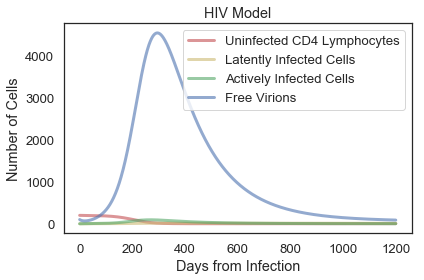

In [207]:
plot_results(results)

## Individual Cell Type Graphs

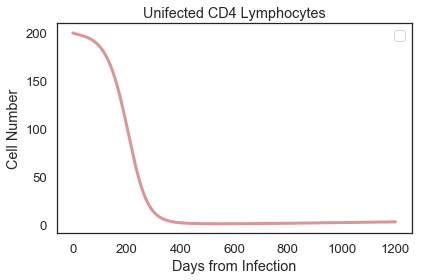

In [190]:
plot(results.R,'r')
decorate(title= 'Uninfected CD4 Lymphocytes',xlabel='Days from Infection', ylabel= 'Number of Cells')

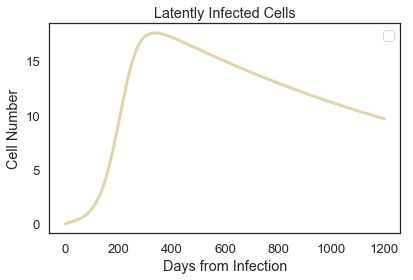

In [191]:
plot(results.L,'y')
decorate(title= 'Latently Infected Cells',xlabel='Days from Infection', ylabel= 'Number of Cells')

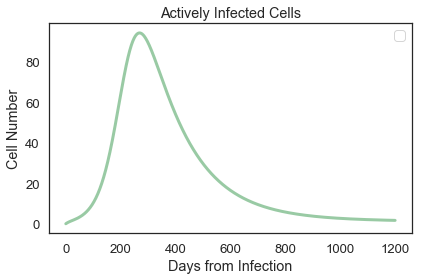

In [192]:
plot(results.E,'g')
decorate(title= 'Actively Infected Cells',xlabel='Days from Infection', ylabel= 'Number of Cells')

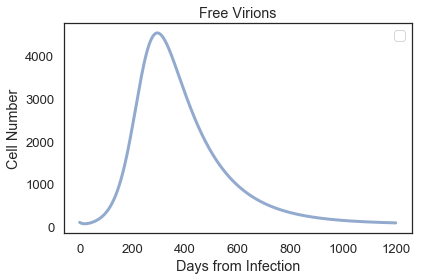

In [193]:
plot(results.V,'b')
decorate(title= 'Free Virions',xlabel='Days from Infection', ylabel= 'Number of Cells')